# Internet Penetration Rate % Analysis

Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

data = pd.read_csv('ko_ro_data.csv', sep=',')
data.columns = list(map(str.strip, data.columns)) # Aligning column names

# Filter the data for Romania and South Korea
romania_data = data[data['Country'] == 'Romania']
korea_data = data[data['Country'] == 'Korea, Rep.']

# Set the index to the Year column
romania_data.set_index('Year', inplace=True)
korea_data.set_index('Year', inplace=True)


Visualizing the Internet Penetration Rates for both Romania and South Korea

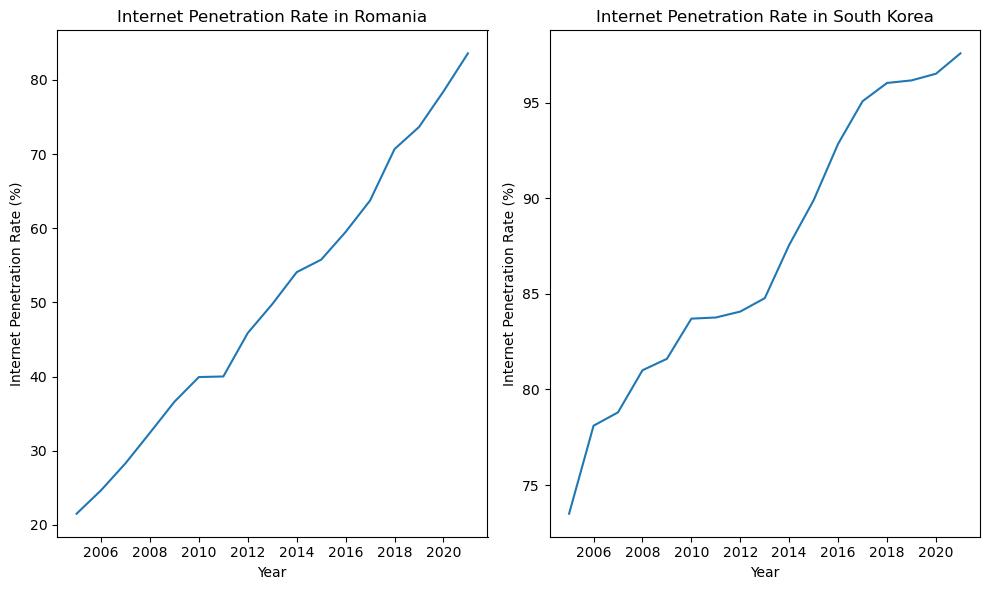

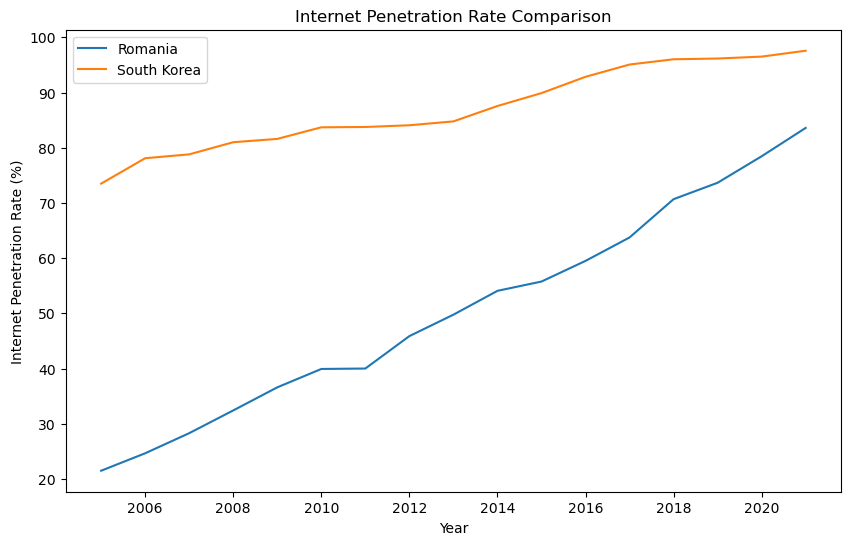

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Internet Penetration Rate in Romania
sns.lineplot(data=romania_data, x='Year', y='Int Pen Rate %', ax=axes[0])
axes[0].set_title('Internet Penetration Rate in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Internet Penetration Rate (%)')

# Internet Penetration Rate in South Korea
sns.lineplot(data=korea_data, x='Year', y='Int Pen Rate %', ax=axes[1])
axes[1].set_title('Internet Penetration Rate in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Internet Penetration Rate (%)')

plt.tight_layout()
plt.show()

# Internet Penetration Rate Comparison Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='Int Pen Rate %', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='Int Pen Rate %', label='South Korea')
plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate (%)')
plt.title('Internet Penetration Rate Comparison')
plt.legend()
plt.show()


Visualizing important socio-economic indicators

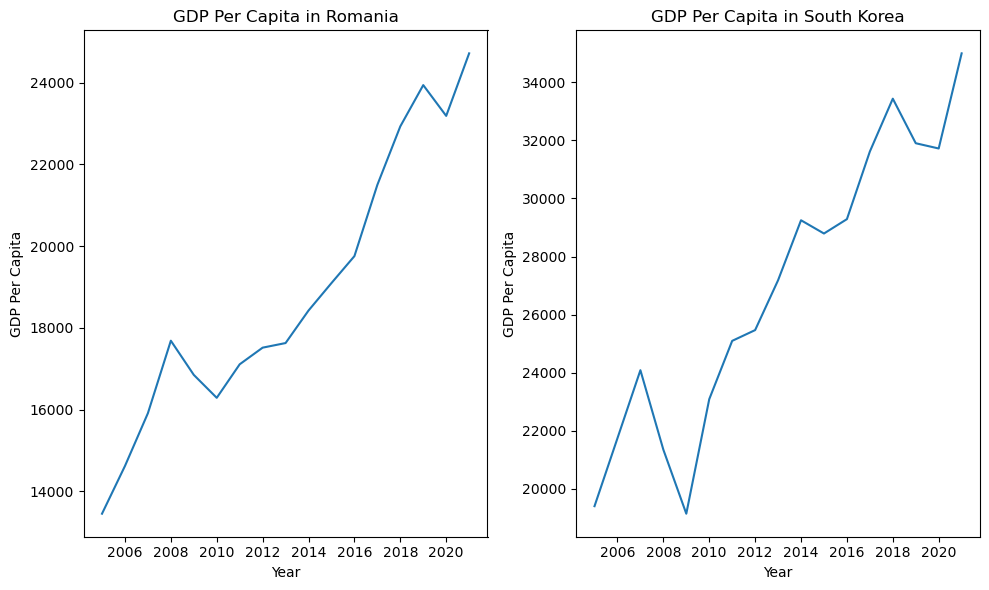

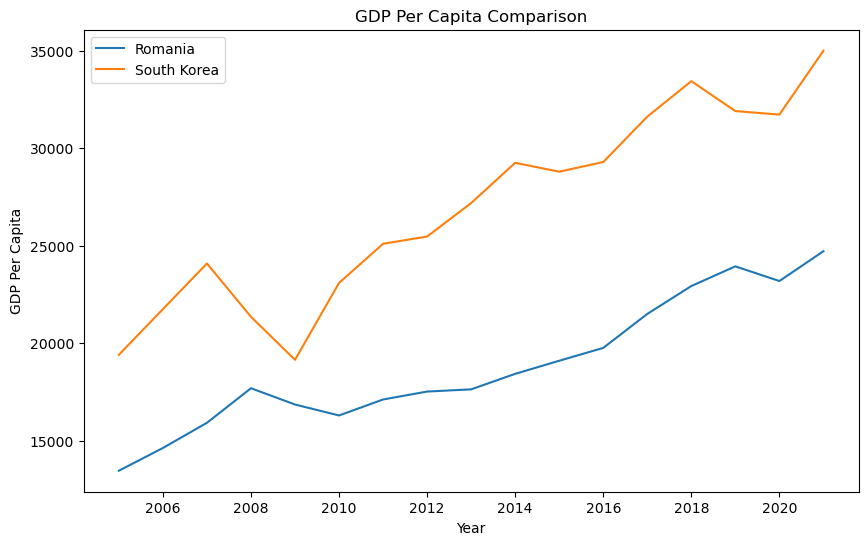

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# GDP Per Capita in Romania
sns.lineplot(data=romania_data, x='Year', y='GDP Per Capita', ax=axes[0])
axes[0].set_title('GDP Per Capita in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP Per Capita')

# GDP Per Capita in South Korea
sns.lineplot(data=korea_data, x='Year', y='GDP Per Capita', ax=axes[1])
axes[1].set_title('GDP Per Capita in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP Per Capita')

plt.tight_layout()
plt.show()

# GDP Comparison Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='GDP Per Capita', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='GDP Per Capita', label='South Korea')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Comparison')
plt.legend()
plt.show()


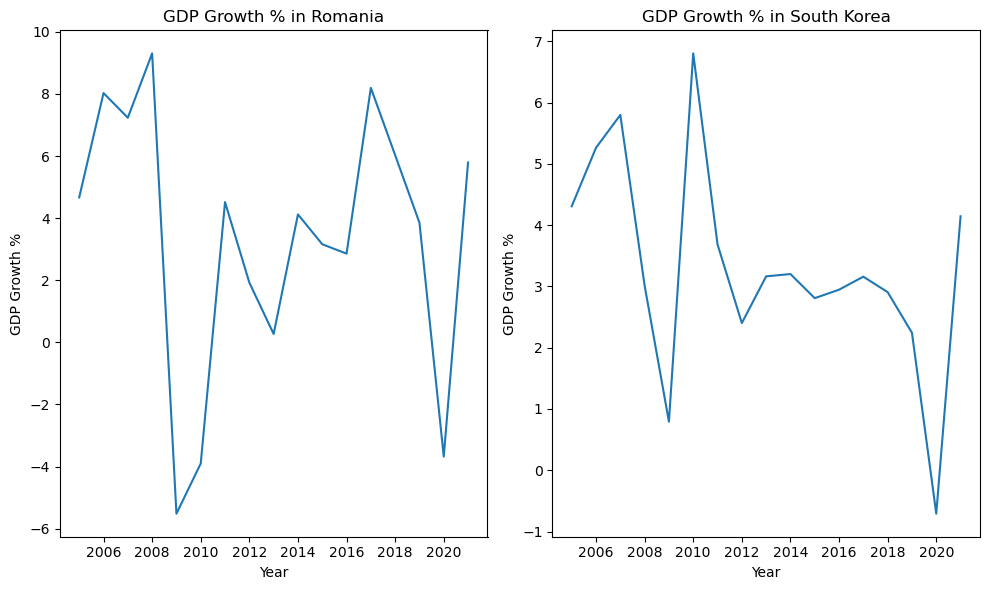

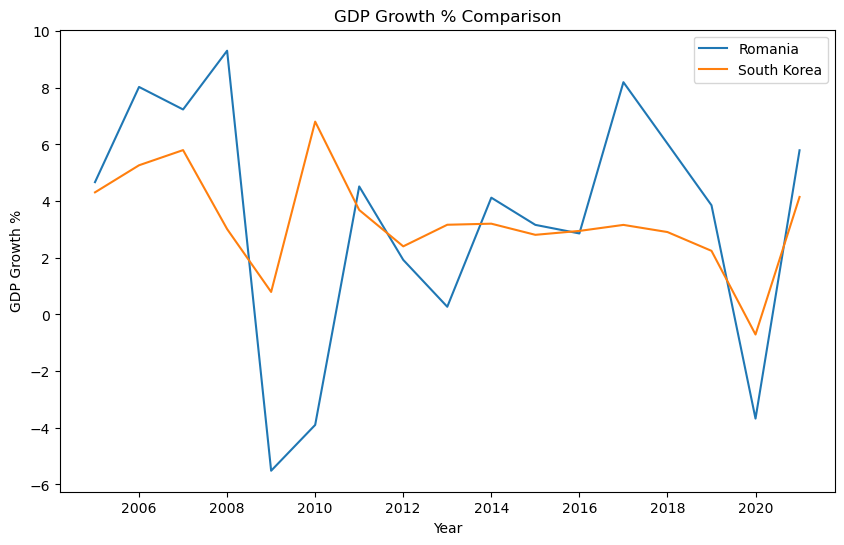

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# GDP Growth % in Romania
sns.lineplot(data=romania_data, x='Year', y='GDP Growth %', ax=axes[0])
axes[0].set_title('GDP Growth % in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP Growth %')

# GDP Growth % in South Korea
sns.lineplot(data=korea_data, x='Year', y='GDP Growth %', ax=axes[1])
axes[1].set_title('GDP Growth % in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP Growth %')

plt.tight_layout()
plt.show()

# GDP Growth % Comparison Plot 
plt.figure(figsize=(10, 6))
sns.lineplot(data=romania_data, x='Year', y='GDP Growth %', label='Romania')
sns.lineplot(data=korea_data, x='Year', y='GDP Growth %', label='South Korea')
plt.xlabel('Year')
plt.ylabel('GDP Growth %')
plt.title('GDP Growth % Comparison')
plt.legend()
plt.show()

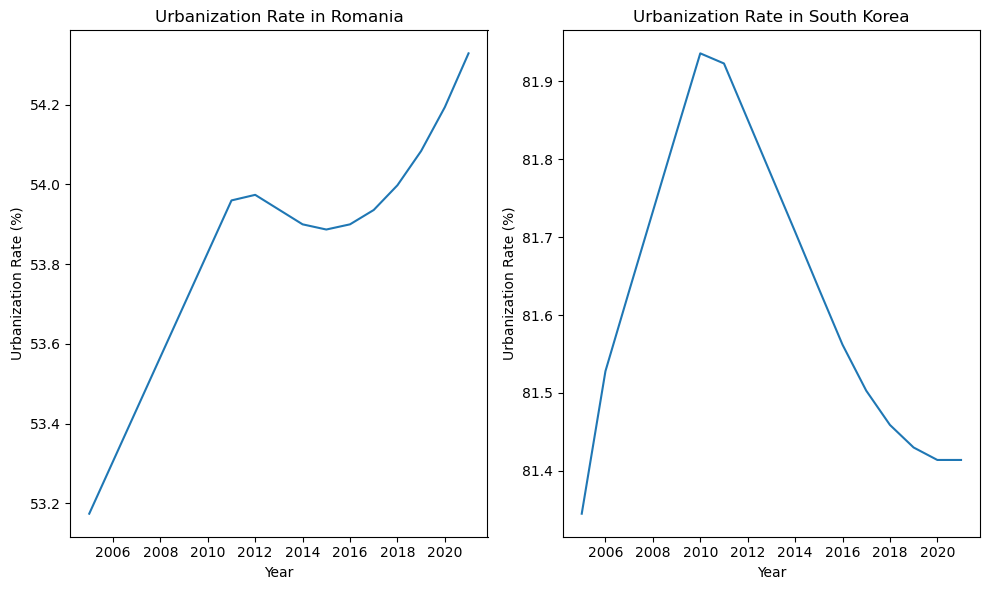

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Urbanization Rate in Romania
sns.lineplot(data=romania_data, x='Year', y='Urbanization Rate %', ax=axes[0])
axes[0].set_title('Urbanization Rate in Romania')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Urbanization Rate (%)')

# Urbanization Rate in South Korea
sns.lineplot(data=korea_data, x='Year', y='Urbanization Rate %', ax=axes[1])
axes[1].set_title('Urbanization Rate in South Korea')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Urbanization Rate (%)')

plt.tight_layout()
plt.show()

EDA with Seaborn Correlation Heatmap

C:\Users\Iustin\AppData\Local\Temp\ipykernel_3488\2778637493.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = romania_data.corr()


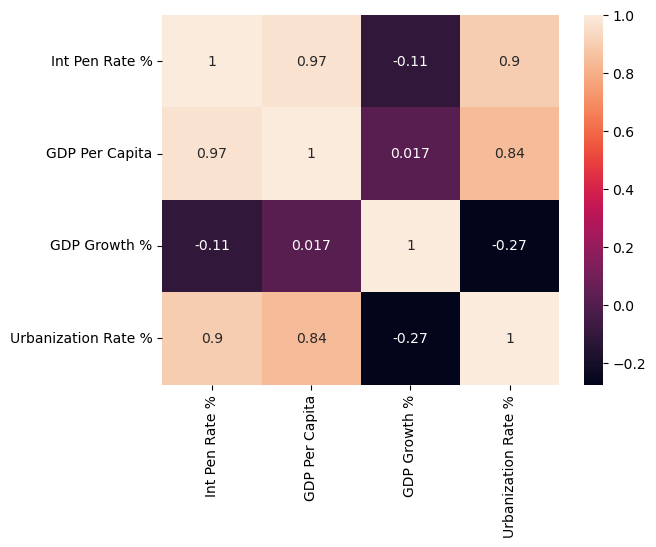

In [6]:
# Romania Coefficients Correlation Heatmap
tc = romania_data.corr()
annot = True
sns.heatmap(tc, annot = annot)
plt.show()

C:\Users\Iustin\AppData\Local\Temp\ipykernel_3488\3540107750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = korea_data.corr()


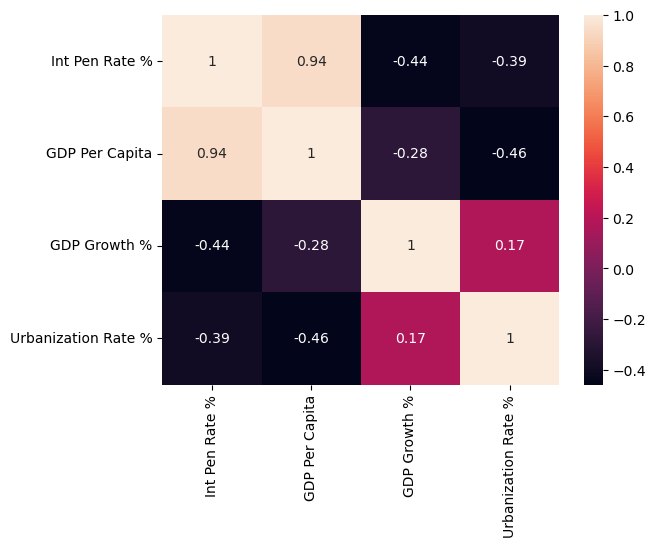

In [7]:
# South Korea Coefficients Correlation Heatmap
tc = korea_data.corr()
annot = True
sns.heatmap(tc, annot = annot)
plt.show()

## PART 1. ARIMA

Preparing the Data

In [88]:
int_pen_rate_ro = romania_data[['Int Pen Rate %']]
int_pen_rate_ko = korea_data[['Int Pen Rate %']]

In [173]:
# Define the cutoff year
cutoff_year = 2018

# Split the dataset into training and testing sets
ro_train = int_pen_rate_ro[int_pen_rate_ro.index <= cutoff_year]
ro_test = int_pen_rate_ro[int_pen_rate_ro.index > cutoff_year]

ko_train = int_pen_rate_ko[int_pen_rate_ko.index <= cutoff_year]
ko_test = int_pen_rate_ko[int_pen_rate_ko.index > cutoff_year]

# Check the shapes of the resulting sets
print("Training data shape:", ro_train.shape)
print("Testing data shape:", ro_test.shape)

Training data shape: (14, 1)
Testing data shape: (3, 1)


### Determining the parameters (p,d,q)

Augmented Dickey-Fuller test for stationarity

In [174]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset): 
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-Value: ", dftest[1])
    print("3. No. of lags: ", dftest[3])

In [175]:
ad_test(ro_train)
# Data is non-stationary because P-value > 0.05

1. ADF:  3.0852959789508856
2. P-Value:  1.0
3. No. of lags:  8


In [176]:
ad_test(ko_train)
# Data is non-stationary because P-value > 0.05

1. ADF:  -0.15472191143117286
2. P-Value:  0.9437078247849123
3. No. of lags:  8


Step 1: Transform to stationary: differencing in order to determine the "d" parameter


<Axes: xlabel='Year'>

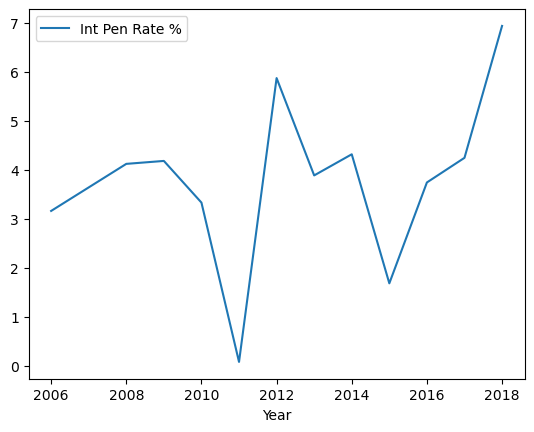

In [177]:
ro_train_diff1 = ro_train.diff().dropna()
ro_train_diff1.plot()

In [178]:
adf_test1 = adfuller(ro_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 0.005058284832451006


<Axes: xlabel='Year'>

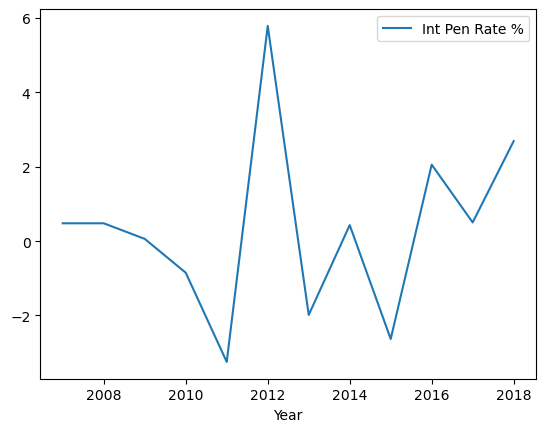

In [179]:
ro_train_diff2 = ro_train.diff().diff().dropna()
ro_train_diff2.plot()

In [180]:
adf_test2 = adfuller(ro_train_diff2)
print(f'p-value: {adf_test2[1]}')

# We set the parameter d = 2

p-value: 0.00042898434761886976


Step 2. Determine p, q parameters with the ACF, PACF plots to the differenced data

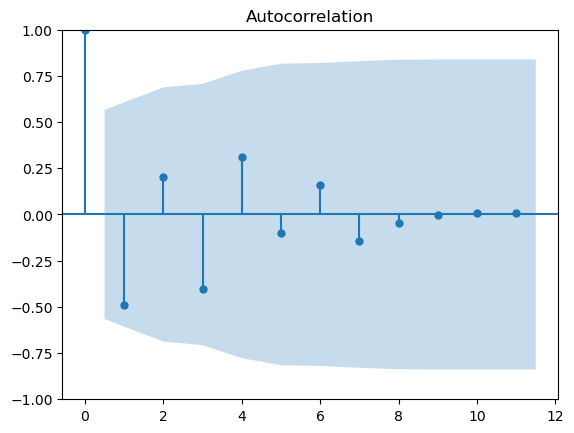

In [191]:
acf_diff = plot_acf(ro_train_diff2)

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


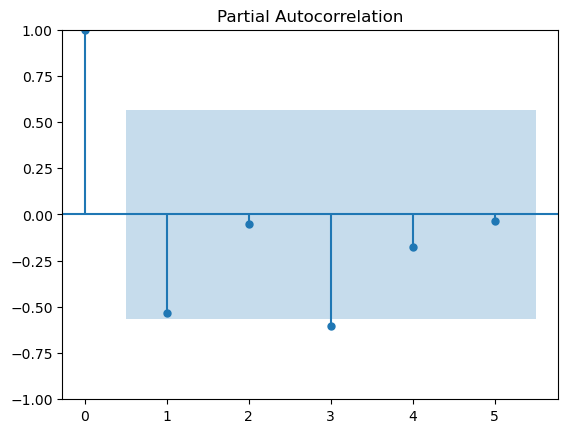

In [183]:
pacf_diff = plot_pacf(ro_train_diff2, lags = 5)

# The ACF plot decays more gradually than the PACF plot & the PACF has a significant spike at lag p, but not beyond
# This may suggest an ARIMA of (p, 2, 0)

In [198]:
from statsmodels.tsa.stattools import adfuller

print('Romania')
result = adfuller(ro_train.dropna())
print('p-value:', result[1])

result = adfuller(ro_train.diff().dropna())
print('p-value:', result[1])

result = adfuller(ro_train.diff().diff().dropna())
print('p-value:', result[1])
print('\n')

# As we compare the values below, we can see that after the 1st order differencing, the p-value drops below the acceptable threshold of 0.05.
# So the data is now stationary after differencing.
# Thus we can consider the "d" parameter: number of nonseasonal differencing = 1/2 (2 better)

print('South Korea')
result = adfuller(ko_train.dropna())
print('p-value:', result[1])

result = adfuller(ko_train.diff().dropna())
print('p-value:', result[1])

result = adfuller(ko_train.diff().diff().dropna())
print('p-value:', result[1])

# "d" parameter = 1

Romania
p-value: 1.0
p-value: 0.005058284832451006
p-value: 0.00042898434761886976


South Korea
p-value: 0.9437078247849123
p-value: 0.00028378116489369054
p-value: 0.5734228868839822


Autocorrelation plot for each country

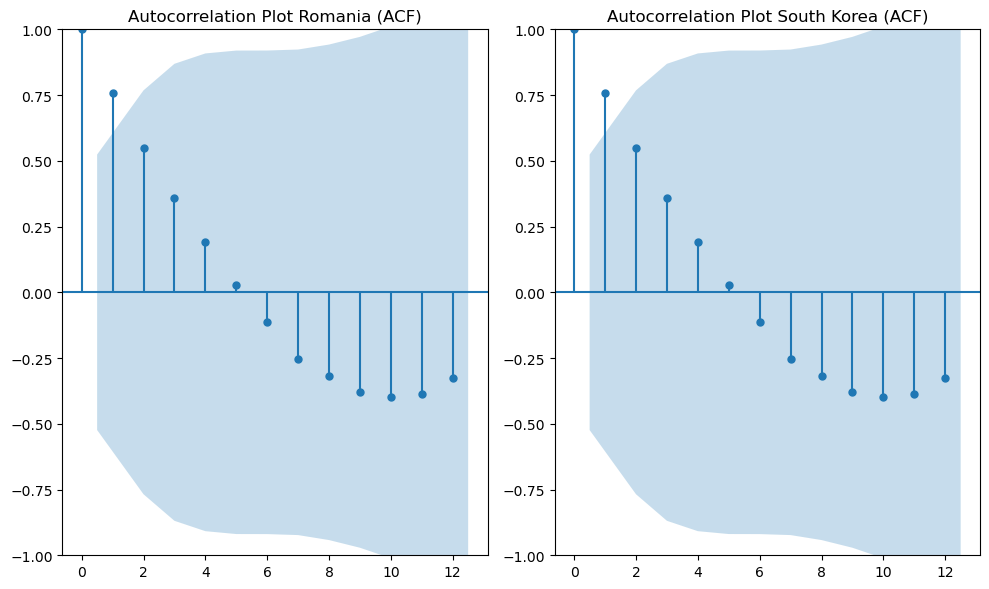

In [196]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Romania
plot_acf(ro_train, ax=ax1)
ax1.set_title('Autocorrelation Plot Romania (ACF)')

# South Korea
plot_acf(ro_train, ax=ax2)
ax2.set_title('Autocorrelation Plot South Korea (ACF)')

plt.tight_layout()
plt.show()

1st Order Differencing and Autocorrelation 

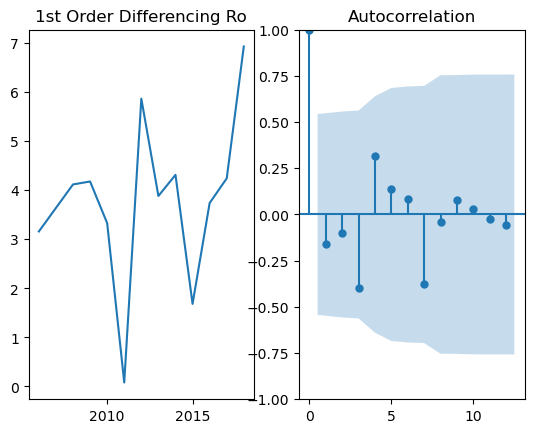

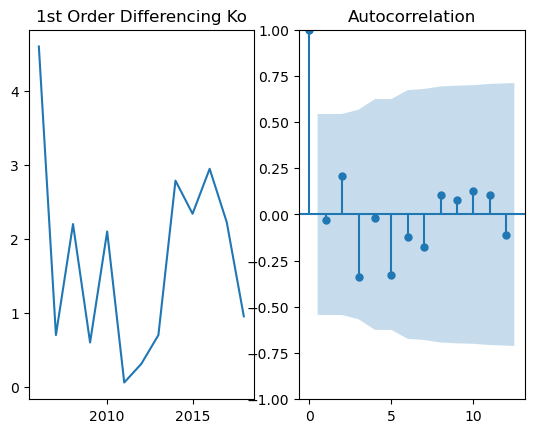

In [185]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots

# Romania
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing Ro')
ax1.plot(ro_train.diff())

ax2 = f.add_subplot(122)
plot_acf(ro_train.diff().dropna(), ax = ax2)
plt.show()

# South Korea
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing Ko')
ax1.plot(ko_train.diff())

ax2 = f.add_subplot(122)
plot_acf(ko_train.diff().dropna(), ax = ax2)
plt.show()

2nd Order Differencing and Autocorrelation

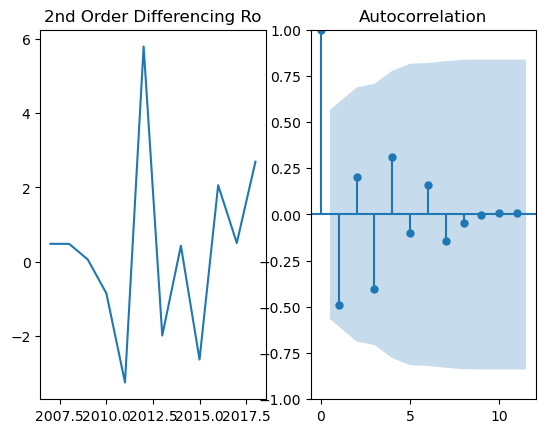

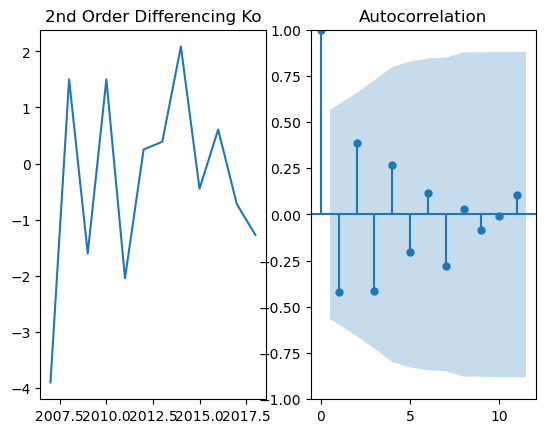

In [186]:
# Romania
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing Ro')
ax1.plot(ro_train.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(ro_train.diff().diff().dropna(), ax = ax2)
plt.show()

# The 1st Order Differencing plot proves to be more statistically significant than the 2nd Order Differencing plot
# p = 1, number of autoregressive terms

# South Korea
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing Ko')
ax1.plot(ko_train.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(ko_train.diff().diff().dropna(), ax = ax2)
plt.show()
 
# The 1st Order Differencing plot proves to be more statistically significant than the 2nd Order Differencing plot
# p = 1, number of autoregressive terms

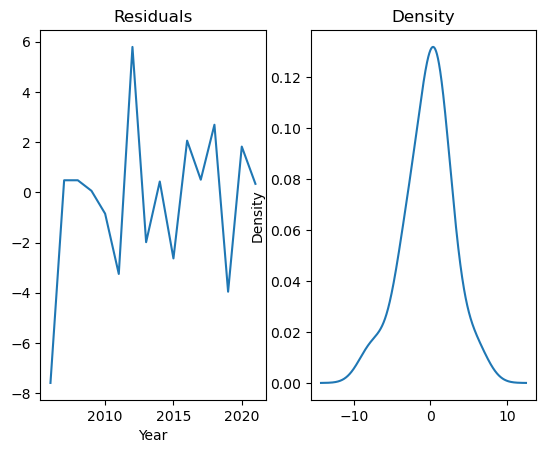

In [209]:
residuals = ro_model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title = 'Residuals', ax= ax[0])
residuals.plot(title = 'Density', kind= 'kde', ax= ax[1])
plt.show()

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


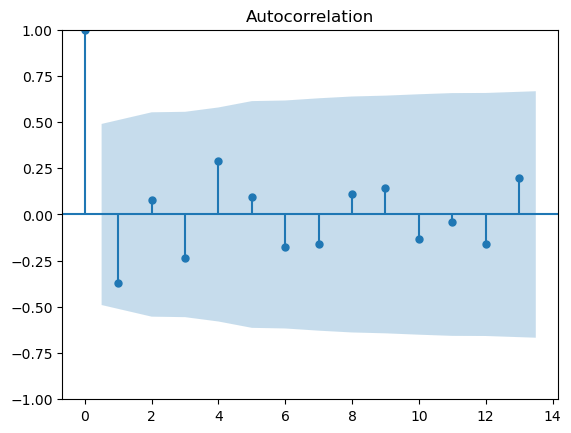

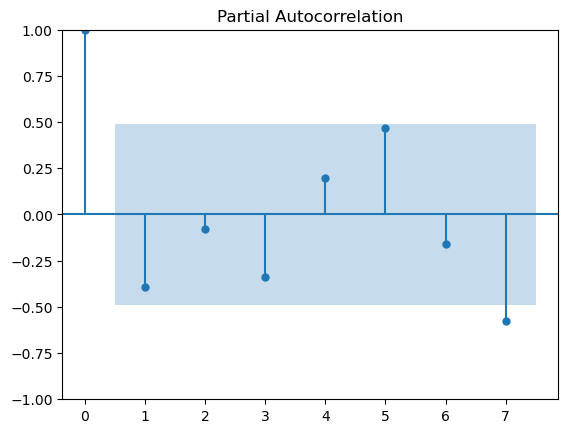

In [210]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals, lags = 7)

# The plots don't show any significant spikes, meaning that the residuals are close to white noise

Step 3: Building ARIMA Model for Internet Penetration Rate

Romania

In [248]:
from statsmodels.tsa.arima.model import ARIMA

# Romania
# Define the order for the ARIMA model
order = (1, 2, 0) # or 0, 2, 0

# Create the ARIMA model for Internet Pen Rate
ro_model = ARIMA(romania_data['Int Pen Rate %'], order=order)
ro_model_fit = ro_model.fit()

# Predicting the test set
forecast_ro_test = ro_model_fit.forecast(len(ro_test))

# Predict the Internet Pen Rate for 2022, 2023 and 2024
forecast_ro_pen_rate = ro_model_fit.forecast(steps=3)

print(ro_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Int Pen Rate %   No. Observations:                   17
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -31.714
Date:                Fri, 01 Sep 2023   AIC                             67.427
Time:                        13:43:31   BIC                             68.843
Sample:                             0   HQIC                            67.412
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5373      0.267     -2.010      0.044      -1.061      -0.013
sigma2         3.9270      1.863      2.108      0.035       0.276       7.578
Ljung-Box (L1) (Q):                   0.47   Jarque-

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa

C:\Users\Iustin\AppData\Local\Temp\ipykernel_3488\43970349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_pen_rate_ro['forecast manual'] = [None]* len(ro_train) + list(forecast_ro_test)


<Axes: xlabel='Year'>

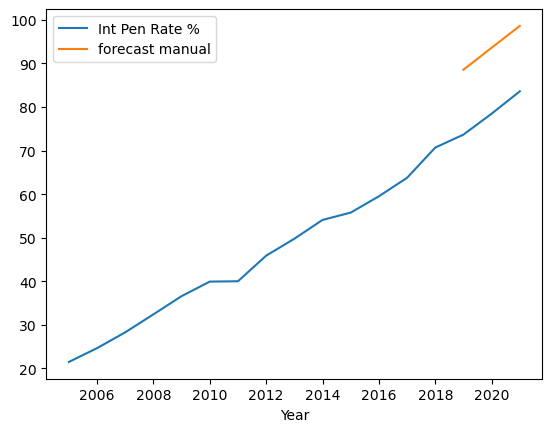

In [249]:
int_pen_rate_ro['forecast manual'] = [None]* len(ro_train) + list(forecast_ro_test)
int_pen_rate_ro.plot()

South Korea

In [250]:

# Create the ARIMA model for Internet Pen Rate
ko_model = ARIMA(korea_data['Int Pen Rate %'], order=(1,1,0))
ko_model_fit = ko_model.fit()

# Predicting the test set
forecast_ko_test = ko_model_fit.forecast(len(ko_test))

# Predict the Internet Pen Rate for 2022, 2023 and 2024
forecast_ko_pen_rate = ko_model_fit.forecast(steps=3)

print(ko_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Int Pen Rate %   No. Observations:                   17
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -29.192
Date:                Fri, 01 Sep 2023   AIC                             62.384
Time:                        13:43:37   BIC                             63.929
Sample:                             0   HQIC                            62.463
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7439      0.118      6.305      0.000       0.513       0.975
sigma2         2.1399      0.839      2.551      0.011       0.496       3.784
Ljung-Box (L1) (Q):                   5.50   Jarque-

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa

C:\Users\Iustin\AppData\Local\Temp\ipykernel_3488\2073257083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_pen_rate_ko['forecast manual'] = [None]* len(ko_train) + list(forecast_ko_test)


<Axes: xlabel='Year'>

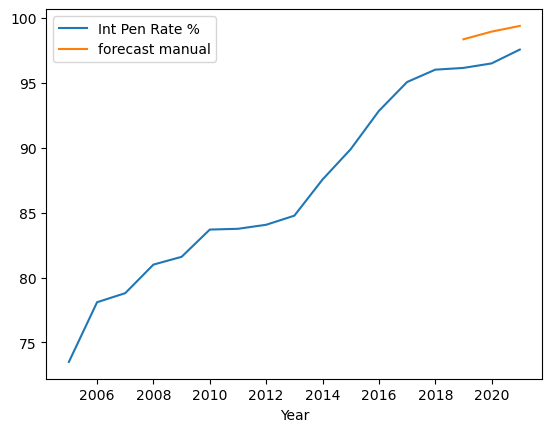

In [251]:
int_pen_rate_ko['forecast manual'] = [None]* len(ko_train) + list(forecast_ko_test)
int_pen_rate_ko.plot()

Visualizing the predictions for years 2022, 2023 and 2024

In [252]:
# Romania
print("Romania\n")
print("Internet Pen Rate % forecast:")
print(forecast_ro_pen_rate)

Romania

Internet Pen Rate % forecast:
17    88.544323
18    93.595608
19    98.594568
Name: predicted_mean, dtype: float64


In [253]:
# South Korea
print("South Korea\n")
print("Internet Pen Rate % forecast:")
print(forecast_ko_pen_rate)

South Korea

Internet Pen Rate % forecast:
17    98.364558
18    98.954668
19    99.393670
Name: predicted_mean, dtype: float64


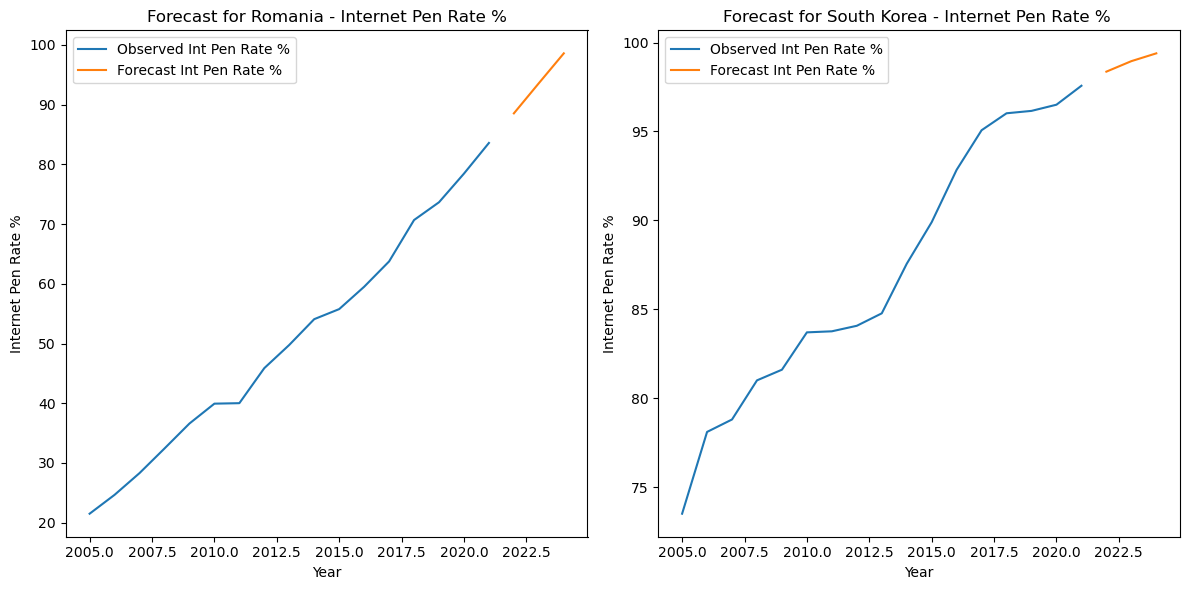

In [254]:
# Create a figure and axis objects for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Romania
ax1.plot(romania_data.index, romania_data['Int Pen Rate %'], label='Observed Int Pen Rate %')
ax1.plot([2022, 2023, 2024], forecast_ro_pen_rate, label='Forecast Int Pen Rate %')
ax1.set_xlabel('Year')
ax1.set_ylabel('Internet Pen Rate %')
ax1.set_title('Forecast for Romania - Internet Pen Rate %')
ax1.legend()

# Plot for the US
ax2.plot(korea_data.index, korea_data['Int Pen Rate %'], label='Observed Int Pen Rate %')
ax2.plot([2022, 2023, 2024], forecast_ko_pen_rate, label='Forecast Int Pen Rate %')
ax2.set_xlabel('Year')
ax2.set_ylabel('Internet Pen Rate %')
ax2.set_title('Forecast for South Korea - Internet Pen Rate % ')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

Evaluating Model Peformance

In [258]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Evaluating ARIMA model for Romania
mae = mean_absolute_error(ro_test, forecast_ro_test)
mape = mean_absolute_percentage_error(ro_test, forecast_ro_test)
rmse = np.sqrt(mean_squared_error(ro_test, forecast_ro_test))

print(f'mae:  {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}\n')

# Evaluating ARIMA model for South Korea
mae = mean_absolute_error(ko_test, forecast_ko_test)
mape = mean_absolute_percentage_error(ko_test, forecast_ko_test)
rmse = np.sqrt(mean_squared_error(ko_test, forecast_ko_test))

print(f'mae:  {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')

mae:  15.010442679091767
mape: 0.19152852523340502
rmse: 15.01080007853355

mae:  2.159643003855043
mape: 0.02233730746165266
rmse: 2.175029936315144


## PART 2. Polynomial Regression

### Poly Reg Model 1 with Year as independent variable

In [76]:
from sklearn.model_selection import train_test_split

X = romania_data.index.values.reshape(-1, 1)
y = romania_data['Int Pen Rate %']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2 
poly = PolynomialFeatures(degree=degree)
X_train_poly1 = poly.fit_transform(X_train)
X_test_poly1 = poly.transform(X_test)

# Fit the polynomial regression model
model1 = LinearRegression()
model1.fit(X_train_poly1, y_train)

LinearRegression()

Making future predictions

In [77]:
# Predict future values (years 2022, 2023, and 2024)
future_years = [2019, 2020, 2021, 2022, 2023, 2024]
future_data = pd.DataFrame({'Year': future_years})

# Create polynomial features for the future years
future_data_poly = poly.transform(future_data)

# Predict internet penetration rates for future years
future_predictions1 = model1.predict(future_data_poly)

c:\Users\Iustin\anaconda3\envs\DataScience\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


Visualizing the Polynomial Regression results

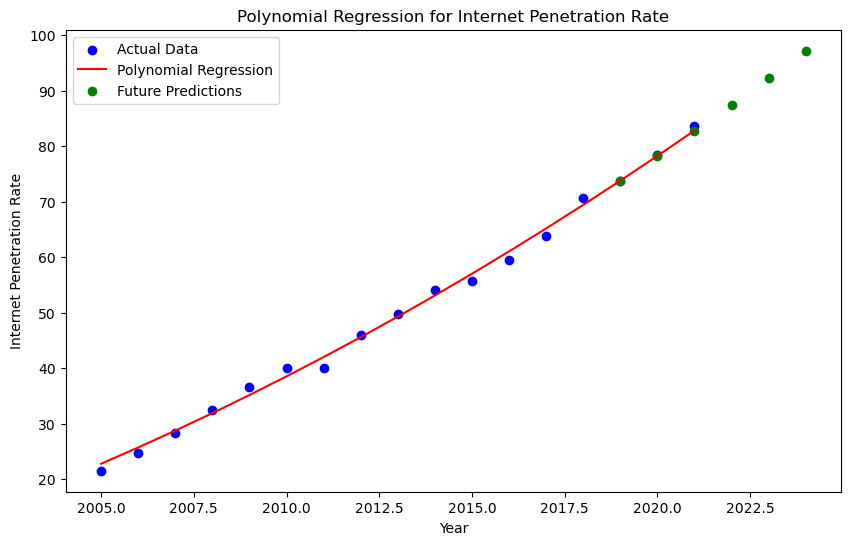

Year 2019: Predicted Internet Penetration Rate = 73.77
Year 2020: Predicted Internet Penetration Rate = 78.24
Year 2021: Predicted Internet Penetration Rate = 82.82
Year 2022: Predicted Internet Penetration Rate = 87.51
Year 2023: Predicted Internet Penetration Rate = 92.31
Year 2024: Predicted Internet Penetration Rate = 97.21


In [78]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(romania_data.index, romania_data['Int Pen Rate %'], label='Actual Data', color='blue')
plt.plot(romania_data.index, model1.predict(poly.transform(X)), label='Polynomial Regression', color='red')
plt.scatter(future_years, future_predictions1, label='Future Predictions', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate')
plt.title('Polynomial Regression for Internet Penetration Rate')
plt.legend()
plt.show()

# Print the predictions for future years
for year, prediction in zip(future_years, future_predictions1):
    print(f'Year {year}: Predicted Internet Penetration Rate = {prediction:.2f}')

Model Evaluation on the Training Data

In [79]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the training set
y_train_pred = model1.predict(X_train_poly1)

# Calculate R-squared score for training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate Mean Absolute Error (MAE) for training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)

print(f'R-squared Score (Training): {r2_train:.2f}')
print(f'Mean Absolute Error (MAE) (Training): {mae_train:.2f}')
print(f'Mean Squared Error (MSE) (Training): {mse_train:.2f}')
print(f'Root Mean Squared Error (RMSE) (Training): {rmse_train:.2f}')

R-squared Score (Training): 1.00
Mean Absolute Error (MAE) (Training): 0.92
Mean Squared Error (MSE) (Training): 1.11
Root Mean Squared Error (RMSE) (Training): 1.05


Model Evaluation on the Test Data

In [80]:
# Make predictions on the test set
y_pred1 = model1.predict(X_test_poly1)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred1)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'R-squared Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

R-squared Score: 0.99
Mean Absolute Error (MAE): 1.12
Mean Squared Error (MSE): 1.55
Root Mean Squared Error (RMSE): 1.24


### Poly Reg Model 2 with Year and GDP Per Capita as independent variables

In [81]:
from sklearn.model_selection import train_test_split

X = np.column_stack((romania_data.index.values, romania_data['GDP Per Capita']))
y = romania_data['Int Pen Rate %']

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)    

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly2 = poly.fit_transform(X_train)
X_test_poly2 = poly.transform(X_test)

# Fit the polynomial regression model
model2 = LinearRegression()
model2.fit(X_train_poly2, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test_poly2)

 Making future predictions

In [82]:
# Years for prediction (2019 to 2024)
future_years = np.arange(2019, 2025)

# Actual values of the GDP Per Capita for years 2019-2024 required for future predictions
future_gdp_per_capita = [23937.58136, 23184.61479, 24714.24507, 26271.009779, 27257.051296, 28508.437792]
# Create a feature matrix for these years with GDP Per Capita
future_data = np.column_stack((future_years, future_gdp_per_capita))

# Transform the feature matrix with polynomial features
future_data_poly = poly.transform(future_data)

# Predict Internet Penetration Rate for future years
future_predictions2 = model2.predict(future_data_poly)

# Print the predictions for future years
for year, prediction in zip(future_years, future_predictions2):
    print(f'Year {year}: Predicted Internet Penetration Rate = {prediction:.2f}')

Year 2019: Predicted Internet Penetration Rate = 74.65
Year 2020: Predicted Internet Penetration Rate = 77.51
Year 2021: Predicted Internet Penetration Rate = 82.83
Year 2022: Predicted Internet Penetration Rate = 87.93
Year 2023: Predicted Internet Penetration Rate = 92.62
Year 2024: Predicted Internet Penetration Rate = 97.42


Visualizing the results

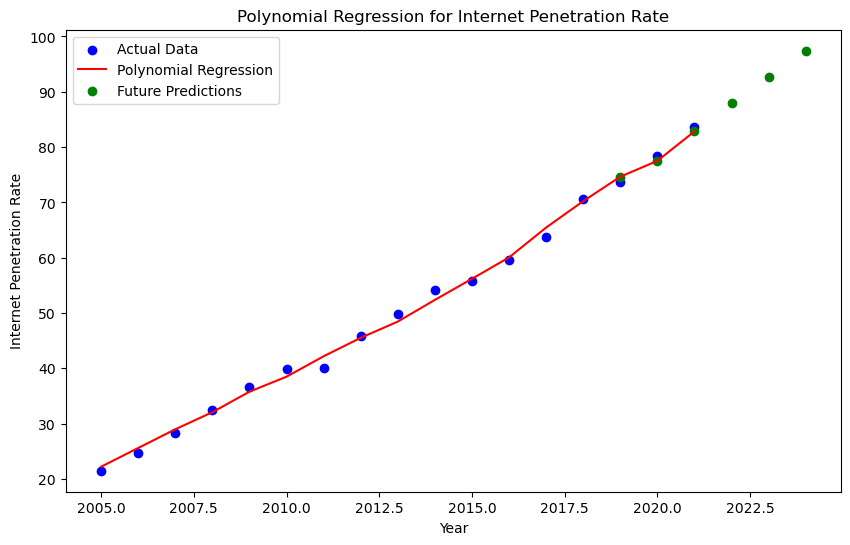

In [83]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(romania_data.index, romania_data['Int Pen Rate %'], label='Actual Data', color='blue')
plt.plot(romania_data.index, model2.predict(poly.transform(X)), label='Polynomial Regression', color='red')
plt.scatter(future_years, future_predictions2, label='Future Predictions', color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate')
plt.title('Polynomial Regression for Internet Penetration Rate')
plt.legend()
plt.show()

 Model Evaluation on the Training Data

In [84]:
y_train_pred = model2.predict(X_train_poly2)

r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print(f'R-squared Score (Training): {r2_train:.2f}')
print(f'Mean Absolute Error (MAE) (Training): {mae_train:.2f}')
print(f'Mean Squared Error (MSE) (Training): {mse_train:.2f}')
print(f'Root Mean Squared Error (RMSE) (Training): {rmse_train:.2f}')

R-squared Score (Training): 1.00
Mean Absolute Error (MAE) (Training): 0.78
Mean Squared Error (MSE) (Training): 0.77
Root Mean Squared Error (RMSE) (Training): 0.88


Model Evaluation on the Test Data

In [85]:
# Calculate evaluation metrics for the test data
r2 = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print(f'R-squared Score (Test): {r2:.2f}')
print(f'Mean Absolute Error (MAE) (Test): {mae:.2f}')
print(f'Mean Squared Error (MSE) (Test): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) (Test): {rmse:.2f}')

R-squared Score (Test): 0.98
Mean Absolute Error (MAE) (Test): 1.53
Mean Squared Error (MSE) (Test): 2.56
Root Mean Squared Error (RMSE) (Test): 1.60


Visualizing the predictions of Model 1 and Model 2

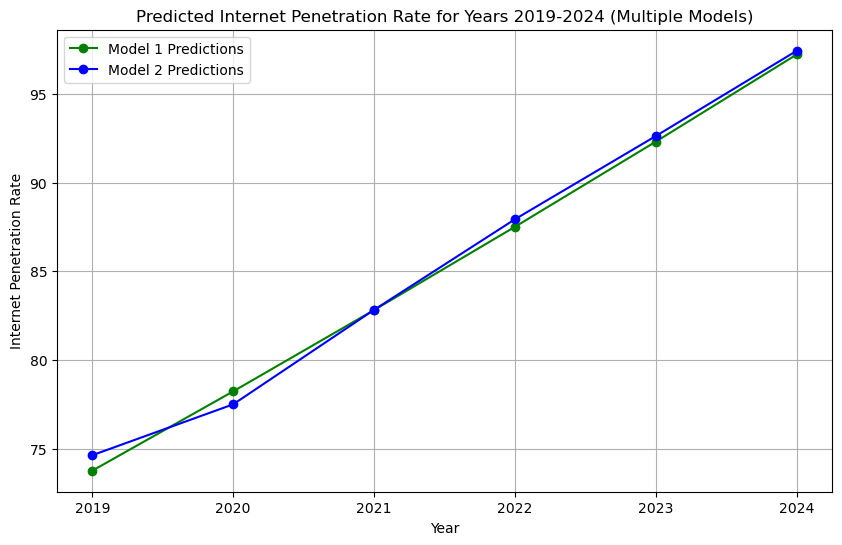

In [86]:
# Years for prediction (2019 to 2024)
future_years = np.arange(2019, 2025)

# Plot both sets of predictions
plt.figure(figsize=(10, 6))

# Plot predictions from model 1
plt.plot(future_years, future_predictions1, marker='o', linestyle='-', color='green', label='Model 1 Predictions')

# Plot predictions from model 2
plt.plot(future_years, future_predictions2, marker='o', linestyle='-', color='blue', label='Model 2 Predictions')

plt.xlabel('Year')
plt.ylabel('Internet Penetration Rate')
plt.title('Predicted Internet Penetration Rate for Years 2019-2024 (Multiple Models)')
plt.legend()
plt.grid(True)
plt.show()